In [6]:
import os
import cv2 # openCV
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

In [18]:
def min_max_stretch(img): 
    x_min = img.min() 
    x_max = img.max() 
    
    # Avoid division by zero if the image is flat 
    if x_max == x_min: 
        return np.zeros_like(img, dtype=np.uint8) 
    
    stretched = (img - x_min) * (255.0 / (x_max - x_min)) 
    return stretched.astype(np.uint8)

def percentile_stretch(img, low=2, high=98):
    p_low = np.percentile(img, low)
    p_high = np.percentile(img, high)
    stretched = np.clip((img - p_low) * (255.0 / (p_high - p_low)), 0, 255)
    return stretched

def cv2_equalizer(img):
    return cv2.equalizeHist(img)

def global_threshold(img, T):
    return (img >= T).astype(np.uint8) * 255

def meteor_stretch(img, Bmin, Bmax): 
    stretched = (img - Bmin) * (255.0 / (Bmax - Bmin)) 
    stretched = np.clip(stretched, 0, 255)
    inverted = 255 - stretched 
    return inverted.astype(np.uint8)

def plot_img(img):
    fig = px.imshow(img, color_continuous_scale="gray")
    fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [35]:
def plot_images_and_histograms(original, processed_images, titles):
    """
    original: 2D grayscale image
    processed_images: list of 2D grayscale images
    titles: list of titles for each processed image
    """

    # Ensure uint8 and squeeze
    original = np.clip(np.squeeze(original), 0, 255).astype(np.uint8)
    processed_images = [
        np.clip(np.squeeze(img), 0, 255).astype(np.uint8)
        for img in processed_images
    ]

    # Combine original + processed
    all_images = [original] + processed_images
    all_titles = ["Original"] + titles

    n = len(all_images)

    # Create figure: 2 rows (images + histograms)
    fig, axes = plt.subplots(2, n, figsize=(4*n, 8))

    # --- Row 1: Images ---
    for i, img in enumerate(all_images):
        axes[0, i].imshow(img, cmap="gray", vmin=0, vmax=255)
        axes[0, i].set_title(all_titles[i])
        axes[0, i].axis("off")

    # --- Row 2: Histograms ---
    for i, img in enumerate(all_images):
        counts, _ = np.histogram(img.ravel(), bins=range(257))
        axes[1, i].bar(range(256), counts, width=3.0)
        axes[1, i].set_xlim(-1, 256)
        if i == 5:
            axes[1, i].set_ylim(0, np.max(counts[1:-1])+10)
        axes[1, i].set_title(f"{all_titles[i]} Histogram")

    plt.tight_layout()
    plt.show()

In [20]:
greyscale1 = cv2.imread("../../../data/upftfg26/apujols/processed/sum_image_cropped/M20251003_233536_MasLaRoca_NE_CROP_SUMIMG.png", cv2.IMREAD_GRAYSCALE)
processed_imgs1 = [min_max_stretch(greyscale1),
                  percentile_stretch(greyscale1),
                  cv2_equalizer(greyscale1),
                  global_threshold(greyscale1, 42),
                  meteor_stretch(greyscale1, Bmin=42, Bmax=107)]
titles1 = ["Min max stretch",
          "Percentile stretch",
          "OpenCV equalizer",
          "Global thresholding",
          "Personalized thresholding"]

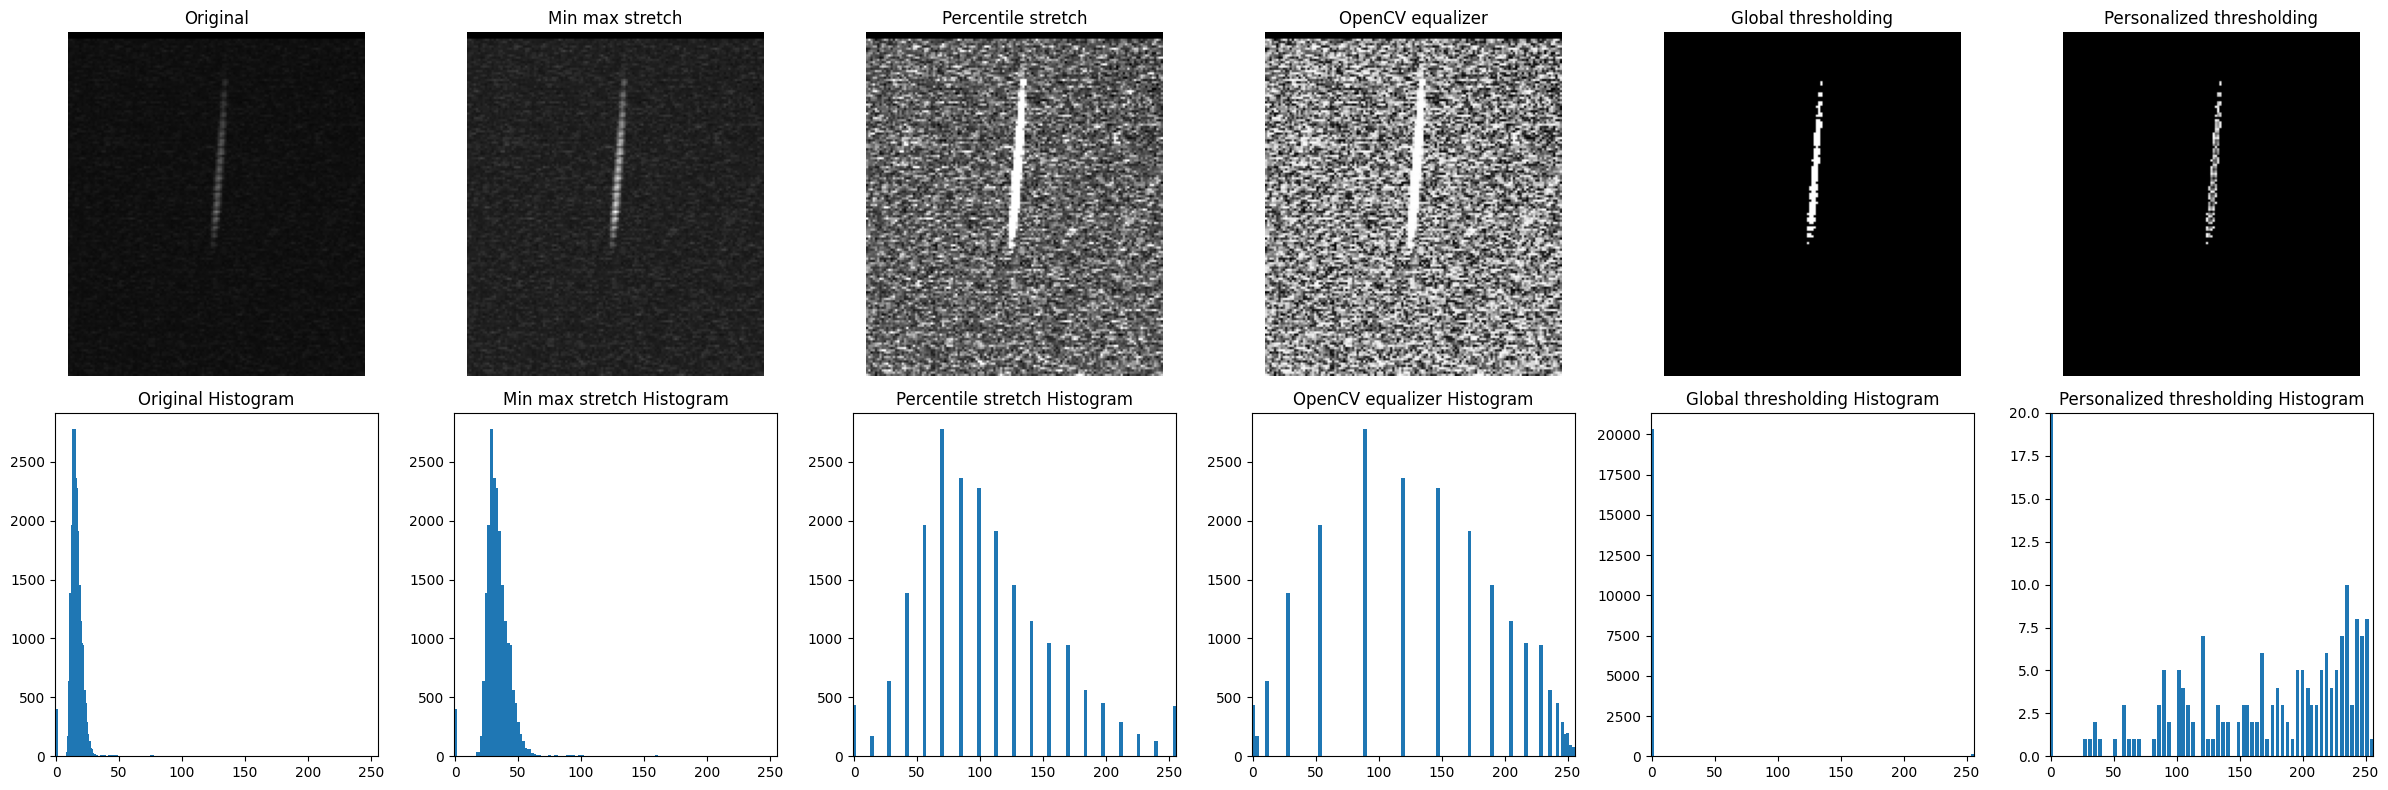

In [36]:
plot_images_and_histograms(greyscale1, processed_images=processed_imgs1, titles=titles1)

In [ ]:
greyscale2 = cv2.imread("../../../data/upftfg26/apujols/processed/sum_image_cropped/M20251002_015749_MasLaRoca_NE_CROP_SUMIMG.png", cv2.IMREAD_GRAYSCALE)
processed_imgs2 = [percentile_stretch(greyscale2),
                  cv2_equalizer(greyscale2),
                  global_threshold(greyscale2, 35),
                  meteor_stretch(greyscale2, Bmin=35, Bmax=55)]
titles2 = ["Percentile stretch",
          "OpenCV equalizer",
          "Global thresholding",
          "Personalized thresholding"]